# NLP (Natural Language Processing) with Python

This is the notebook that goes along with the NLP video lecture!

In this lecture we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

Once you've completed this lecture you'll have a project using some Yelp Text Data!
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below. Or reference the full video lecture**


In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


sebuah koleksi dari sebuah teks bisa kita sebut sebagai "corpus", kita akan mengeprint text tersbut sebagai `enumerate`:

diisni kita akan membaca 

In [6]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

dikarenakan spacing kita dapat katakan bahwa ini adalah TSV ( tab separated values) file, first colum kita adalah label dan sebuah message ham atau spam, sedangkan second column is the message itself. disini kita meng-**enumerate** atau memberikan number pada setiap data cell kita, jadi itu sebenarnya tidak ada

dengan menggunakan contoh ini kita akan train sebuah machine learning model to learn to discriminate between ham/spam automatically. dan dengan trained model, kita dapat mengklasidikasikan arbitrary unlabeled messages as ham or spam. harusnya begitu jadi biar tidak menjadi sampah pada email kita

#### Note:
sebenernya `enumerate`sangat membantu sekali, karena itu bisa diganakan untuk memberikan nomor atau number dari data yang tidak ada

In [21]:
# ini bagian yang gue suka! 
import pandas as pd

In [22]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=["label", "message"])

In [23]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Note:
mengapa kita mengguakan ini ? bukannkah computer vision lebih menarik? karena datanya tidak akan menjadi sebanyak ini, jangan dikira bahasa itu membutuhkan space yang kecil untuk pengolahan mengguakanmachine learning, tapi malah sebaliknya, dia menyimpan data yang cukup besar, karena dalam sau kolom dia bisa berbentuk atau berisi bermacam-macam

## Exploratory Data Analysis


mari kita lihat bagaimana data ini bisa digunakan disini. apakah paradigmannya smaa saja tau berbeda? klaau berbeda bagaimana menggunakan? dan mengubah data tersebut menjadi data tertentu?



In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


masih ingat `grouby` itu diguakan untuk membuat sebuah group berdasakan label tertentu, nah disini kita akan membuat feature yang dapat mengindikasikan ham atau spam

In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

mengapa ini hanya ada dua saja tidak seperti diatas?

sepertiya harus mengulang dai awal 

saya tahu, ternyata datanya harus di traspose, bagaimana varannya

In [12]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [13]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

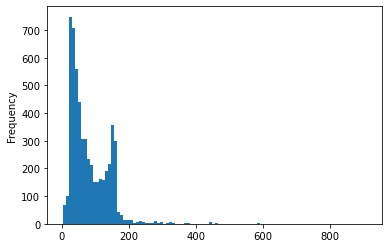

In [15]:
messages['length'].plot(bins=100, kind='hist')

kita bisa menggunakna atau mengubah ubah nilai binsnya itu berefek kepada lebar dari data yang kita kerjakan

In [16]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

910 charracter itu panjang sekali, katanya

In [17]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# note: 
disini idenya adalah, semakin banyak atau semakin panjang text nya berarti menandakan bahwa itu adalah ham atau spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1290d2850>,
      dtype=object)

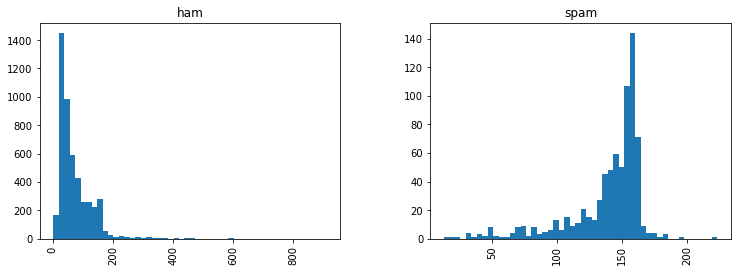

In [18]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

idenya simpel sekali, spam messages adalah yang berisi kontent lebih panjang, selanjutnya kita mengguakan scikit learn

# Text Pre_processing

**masalah pertama** adalah semuanya dalam bentuk string, apa yang bisa kita lakukan? 

disini kita megenal istilah **corpus** dan **vector**,:
- **corpus** : kumpulan strings atau words
- **vector** : nilai atau besaran yang mempunyai arah

banyak sekali metode yang bisa digunakan salah satunya, `bag-of-words` pendekatan bag-of-words. setiap **unique word** dalam sebuah kata diubah menjandi sebuah number, jadi number itu adalah suatu kata yang unik, setlah itu kita cari hubugan, hubungannya dari setiap pattern. sepertinya begitu

- **langkah pertama**: 
buat function yang memisahkan sebuah pesan menjadi sebuah kata individu dan selanjutnya dikembalikan dalam bentuk list. dan memisahkan atau menghilangkan kata article seperti the, etc, a dan lain sebagainnya. yang bisasannya tidak berarti. dari sini kita bisa mendapatkan pengetahuan bahwa seuatu kata yang sering diguakan dalam sebuah aksi spam atau pesan spam biasanya sama. misalnya mengguakan kata-kata ajakan dan lain sebagainnnya. 
    - untuk melakukan semua itu kita bisa menggunakan `NLTK` library. itu merupakan standar library dalam python yang digunakan untuk Natural Language Processing, katanya banyak sekali featurenya. 
    - lets create function that will process the string in the message column, then we can jus use apply in pandas do process all the text in the DataFrame.
    - pertama kita remove puctuation dalam sebauh column, kemudian kita akan mengugnakan apply daalma pandas untuk melakukan semau process tersebut. 


In [20]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

### Review! 09 11 2020: 
ternyata gue belum selesai, ini belum selesai, masih pada kita mengimport string!

sebelumnya kita harus me-review apa yang sebleumnnya ktia pelajari, apa itu? 

- **Pertama** membuat model, pelajari data yang ada, jadi kamu mendapat gambaran bagaimana data tersebut akan diproses atau dilakukan preprocessing!
- **melakukan normalisasi**, dan yang paling penting adalah, melakukan **EDA**!
    lakukan normalisasi data, mengapa itu penting? bukankah kamu sudah melakukan itu semua? atau sudah mempelajari?  
- **Vecorisasi**
    adalah membuat text memnjadi vektor, karena kita tahu kalau kata tidak dapat diolah atau dihitung jika tidka mengguakan vektor, dan itu akan lebih mudah!
- **Training the NLP**

    
### Note: 
remember you really strong at statistic and analytic, but you must remember thats material. espesially for datascience! 




In [26]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/bangunsasongko/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


katannya stopwod tidak ada, berarti kita tidak bisa mengguakan itu, bearti itu ada dimana ya?
ternyata harus di download! terlebih dahulu! 


**butuh intenernet connections!**

In [29]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [30]:
# remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/bangunsasongko/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


disini dia juga tidak bisa karena kita belum emmasukkan stopwords pada nltk! jadi lakukan dulu saja

In [31]:
clean_mess

NameError: name 'clean_mess' is not defined